In [26]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv("CleanedEV.csv") 

In [28]:
dataX = df.drop(columns=['HFUEL'])
dataY = df[['HFUEL']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2)

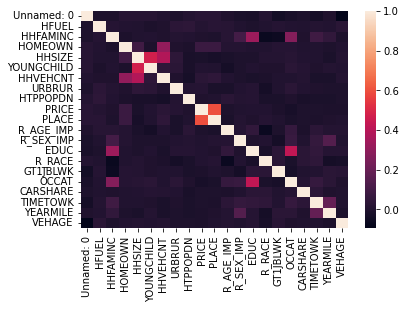

In [30]:
corr = df.corr()
fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [31]:
figure = fig.get_figure()
figure.savefig("data_corr.png", dpi=400)

# Naive bays Model

In [32]:
gnb = GaussianNB(priors=None, var_smoothing=1.0)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test, y_test))

y_pred = nbModel_grid.predict(X_test) 
print(classification_report(y_test,y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validati

GaussianNB(var_smoothing=1.0)
0.9718875502008032
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1210
           1       0.00      0.00      0.00        35

    accuracy                           0.97      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.94      0.97      0.96      1245



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validati

[[1210   35]
 [   0    0]]


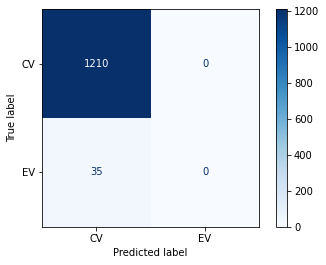

In [33]:
print(confusion_matrix(y_pred, y_test))
plot_confusion_matrix(nbModel_grid, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues)


# Pumping the weight by Using SMOTE with Naive bayes

In [34]:
dataX_over = df.drop(columns=['HFUEL'])
dataY_over = df[['HFUEL']]
Over_Sample = SMOTE()
dataX_over , dataY_over = Over_Sample.fit_resample(dataX_over,dataY_over)

In [35]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(dataX_over, dataY_over, test_size = 0.2)

In [36]:
gnb = GaussianNB(priors=None, var_smoothing=1.0)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_over, y_train_over)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test_over, y_test_over))

y_pred = nbModel_grid.predict(X_test_over) 
print(classification_report(y_test_over,y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validati

GaussianNB()
0.5494233937397035
              precision    recall  f1-score   support

           0       0.73      0.19      0.30      1244
           1       0.52      0.93      0.67      1184

    accuracy                           0.55      2428
   macro avg       0.63      0.56      0.49      2428
weighted avg       0.63      0.55      0.48      2428



[[ 238   88]
 [1006 1096]]


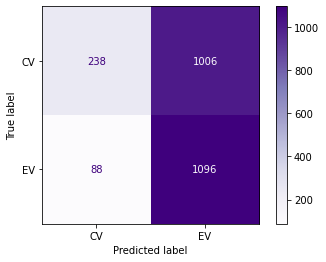

In [37]:
print(confusion_matrix(y_pred, y_test_over))
plot_confusion_matrix(nbModel_grid, X_test_over, y_test_over, display_labels=["CV", "EV"], cmap=plt.cm.Purples)

# Logistic regression model

In [38]:
model_logis1 = LogisticRegression()
model_logis1.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred = model_logis1.predict(X_test)
acc=format(accuracy_score(y_test,y_pred), "0.2%")
print("Accuracy : ",acc)

Accuracy :  97.19%


[[1210   35]
 [   0    0]]


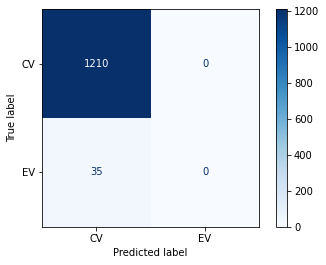

In [40]:
print(confusion_matrix(y_pred, y_test))
plot_confusion_matrix(model_logis1, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1210
           1       0.00      0.00      0.00        35

    accuracy                           0.97      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.94      0.97      0.96      1245



# Pumping the weight by Using SMOTE with Logistic regression

In [42]:
model_logis1.fit(X_train_over,y_train_over)

LogisticRegression()

In [43]:
y_pred = model_logis1.predict(X_test_over)
acc=format(accuracy_score(y_test_over,y_pred), "0.2%")
print("Accuracy : ",acc)

Accuracy :  50.45%


[[895 854]
 [349 330]]


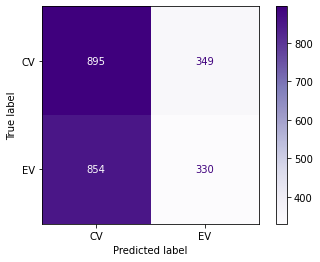

In [44]:
print(confusion_matrix(y_pred, y_test_over))
plot_confusion_matrix(model_logis1, X_test_over, y_test_over, display_labels=["CV", "EV"], cmap=plt.cm.Purples)

In [45]:
print(classification_report(y_test_over,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.72      0.60      1244
           1       0.49      0.28      0.35      1184

    accuracy                           0.50      2428
   macro avg       0.50      0.50      0.48      2428
weighted avg       0.50      0.50      0.48      2428



# Decision tree model

In [46]:
modelClf = DecisionTreeClassifier().fit(dataX, dataY)
for i,j in enumerate(dataX):
  score_f = modelClf.feature_importances_
  print(j, '= ', score_f[i])

Unnamed: 0 =  0.29237107720568417
HHFAMINC =  0.01976831166721951
HOMEOWN =  0.012909405248167373
HHSIZE =  0.04955920451278012
YOUNGCHILD =  0.009351611832865358
HHVEHCNT =  0.041163157857215305
URBRUR =  0.008863768827405001
HTPPOPDN =  0.03624669511650869
PRICE =  0.04374345620614696
PLACE =  0.05300462544468996
R_AGE_IMP =  0.09986134507060962
R_SEX_IMP =  0.010982628345455827
EDUC =  0.054938734379559706
R_RACE =  0.014403887123276901
GT1JBLWK =  0.013132250358152062
OCCAT =  0.02683599736408327
CARSHARE =  0.0005599053389291058
TIMETOWK =  0.06676123158672374
YEARMILE =  0.12002570427232116
VEHAGE =  0.02551700224220608


In [47]:
res_pred = modelClf.predict(X_test)
score = accuracy_score(y_test, res_pred)
print(score)
print(classification_report(y_test, res_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00        35

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245



[[1210    0]
 [   0   35]]


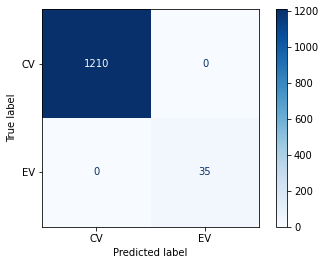

In [48]:
print(confusion_matrix(res_pred , y_test))
plot_confusion_matrix(modelClf, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues)

# Support Vector Machines Model

In [49]:
parameters = {
    'kernel': ['rbf'],
    'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
    'C': [0.001, 0.10, 0.1, 10]
}
cv_svm = GridSearchCV(estimator=svm.SVC(), param_grid=parameters, cv=10, scoring='accuracy')
cv_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 0.1, 10],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [50]:
print(cv_svm.best_params_)

{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}


In [51]:
y_pred = cv_svm.predict(X_test)  # Predict y_pred using SVM classifier
print(classification_report(y_test,y_pred)) # Compare prediction result between original target and predicted target

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1210
           1       0.00      0.00      0.00        35

    accuracy                           0.97      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.94      0.97      0.96      1245



[[1210   35]
 [   0    0]]


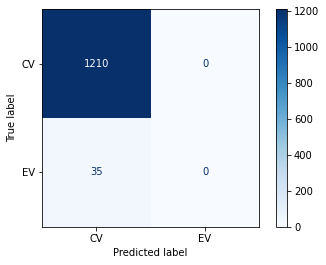

In [52]:
print(confusion_matrix(y_pred, y_test)) # Generating a confusion matrix
plot_confusion_matrix(cv_svm, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues) # Visualizing the confusion matrix

# Linear SVM

In [53]:
lin_svm = svm.SVC(kernel='linear')
lin_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [54]:
y_pred = lin_svm.predict(X_test)  # Predict y_pred using SVM classifier
print(classification_report(y_test,y_pred)) # Compare prediction result between original target and predicted target

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1210
           1       0.00      0.00      0.00        35

    accuracy                           0.97      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.94      0.97      0.96      1245



[[1208   35]
 [   2    0]]


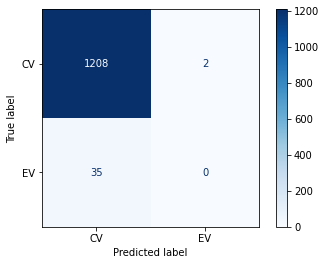

In [55]:
print(confusion_matrix(y_pred, y_test)) # Generating a confusion matrix
plot_confusion_matrix(lin_svm, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues)

# Pumping the weight by Using SMOTE with Support Vector Machines

In [56]:
# define svm as classifier
cv_svm.fit(X_train_over, y_train_over)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 0.1, 10],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [57]:
y_pred_smote = cv_svm.predict(X_test_over)  # Predict y_pred using SVM classifier
print(classification_report(y_test_over,y_pred_smote)) # Compare prediction result between original target and predicted target

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1244
           1       0.84      0.79      0.81      1184

    accuracy                           0.82      2428
   macro avg       0.82      0.82      0.82      2428
weighted avg       0.82      0.82      0.82      2428



[[1064  252]
 [ 180  932]]


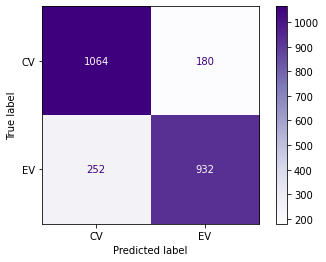

In [58]:
print(confusion_matrix(y_pred_smote, y_test_over)) # Generating a confusion matrix
plot_confusion_matrix(cv_svm, X_test_over, y_test_over, display_labels=["CV", "EV"], cmap=plt.cm.Purples) # Visualizing the confusion matrix

# Pumping the weight by applying SMOTE to Linear SVM

In [59]:
lin_svm.fit(X_train_over, y_train_over)

SVC(kernel='linear')

In [60]:
y_pred_smote = lin_svm.predict(X_test_over)  # Predict y_pred using SVM classifier
print(classification_report(y_test_over,y_pred_smote)) # Compare prediction result between original target and predicted target

              precision    recall  f1-score   support

           0       0.58      0.72      0.64      1244
           1       0.61      0.46      0.52      1184

    accuracy                           0.59      2428
   macro avg       0.59      0.59      0.58      2428
weighted avg       0.59      0.59      0.58      2428



[[892 641]
 [352 543]]


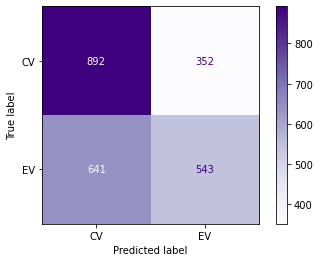

In [61]:
print(confusion_matrix(y_pred_smote, y_test_over)) # Generating a confusion matrix
plot_confusion_matrix(lin_svm, X_test_over, y_test_over, display_labels=["CV", "EV"], cmap=plt.cm.Purples) # Visualizing the confusion matrix


# ROC-AUC Plot

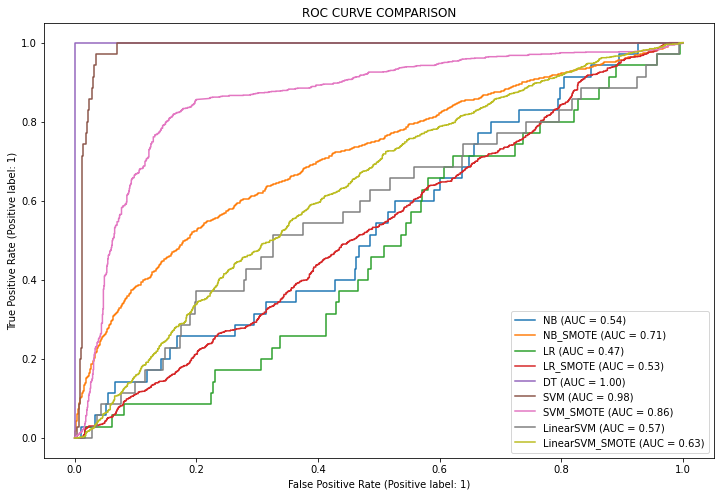

In [63]:
roc_fig = plt.figure(figsize=(12,8))

ax = plt.gca()

# ROC plot of Naive Bayes
plot_roc_curve(nbModel_grid, X_test, y_test, ax=ax, name='NB')

# ROC plot of Naive Bayes which is applied SMOTE
plot_roc_curve(nbModel_grid, X_test_over, y_test_over, ax=ax, name='NB_SMOTE')

# ROC plot of Logistic Regression
plot_roc_curve(model_logis1, X_test, y_test, ax=ax, name='LR')

# ROC plot of Logistic Regression which is applied SMOTE
plot_roc_curve(model_logis1, X_test_over, y_test_over, ax=ax, name='LR_SMOTE')

# ROC plot of Decision Tree
plot_roc_curve(modelClf, X_test, y_test, ax=ax, name='DT')

# ROC plot of Support Vector Machines
plot_roc_curve(cv_svm, X_test, y_test, ax=ax, name='SVM')

# ROC plot of Support Vector Machines which is applied SMOTE
plot_roc_curve(cv_svm, X_test_over, y_test_over, ax=ax, name='SVM_SMOTE')

# ROC plot of Linear SVM
plot_roc_curve(lin_svm, X_test, y_test, ax=ax, name='LinearSVM')

# ROC plot of Linear SVM which is applied SMOTE
plot_roc_curve(lin_svm, X_test_over, y_test_over, ax=ax, name='LinearSVM_SMOTE')

plt.title("ROC CURVE COMPARISON")
plt.show()

In [64]:
figure = roc_fig.get_figure()
figure.savefig("roc_plot.png", dpi=900)